In [1]:
import pandas as pd 
import os

In [2]:
def get_Lake(sheet_name):
    df = pd.read_excel(os.path.join("2024_MCM-ICM_Problems", "Problem_D_Great_Lakes.xlsx"),sheet_name=sheet_name)
    return df.set_index('Year')

In [3]:
Lake_name = ['Lake Superior','Lake Michigan and Lake Huron','Lake St. Clair','Lake Erie','Lake Ontario']

In [4]:
import pandas as pd

def normalize_series(series):
    """
    将Series进行标准化（ meannormalization）
    
    参数:
        - series: 要标准化的Series
        
    返回值:
        - std_normalized_series: 标准化后的Series
    """
    mean_val = series.mean()
  
    normalized_series = (series - mean_val) / mean_val
    
    return normalized_series

In [5]:
get_Lake('Lake Superior').mean()

Jan    183.268261
Feb    183.205217
Mar    183.170870
Apr    183.209130
May    183.309565
Jun    183.397826
Jul    183.457826
Aug    183.471304
Sep    183.464348
Oct    183.447826
Nov    183.406957
Dec    183.347826
dtype: float64

In [6]:
Average_Level = []
Max_level = []
Min_level = []
for i in Lake_name:
    print(f"{i} done!")
    Average_Level.append(get_Lake(i).mean())
    Max_level.append(get_Lake(i).max())
    Min_level.append(get_Lake(i).min())

Lake Superior done!
Lake Michigan and Lake Huron done!
Lake St. Clair done!
Lake Erie done!
Lake Ontario done!


In [8]:
Average_Level = pd.concat(Average_Level,axis=1).mean(axis=0)
Average_Level.index = Lake_name
Average_Level

Lake Superior                   183.346413
Lake Michigan and Lake Huron    176.328913
Lake St. Clair                  175.103043
Lake Erie                       174.280761
Lake Ontario                     74.829783
dtype: float64

In [9]:
Max_level = pd.concat(Max_level,axis=1).max(axis=0)
Max_level.index = Lake_name
Max_level

Lake Superior                   183.88
Lake Michigan and Lake Huron    177.45
Lake St. Clair                  176.04
Lake Erie                       175.14
Lake Ontario                     75.91
dtype: float64

In [10]:
Min_level = pd.concat(Min_level,axis=1).min(axis=0)
Min_level.index = Lake_name
Min_level

Lake Superior                   182.79
Lake Michigan and Lake Huron    175.57
Lake St. Clair                  174.44
Lake Erie                       173.73
Lake Ontario                     74.28
dtype: float64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_heatmap(series):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=series.index, y=series.values)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    plt.xticks(rotation=90)
    plt.show()

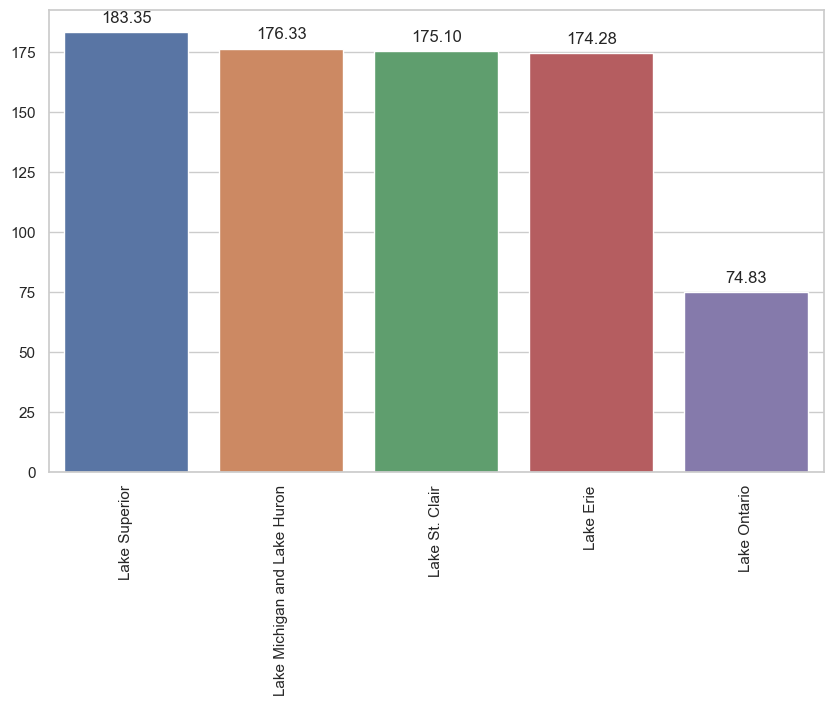

In [92]:
plot_bar_heatmap(Level)

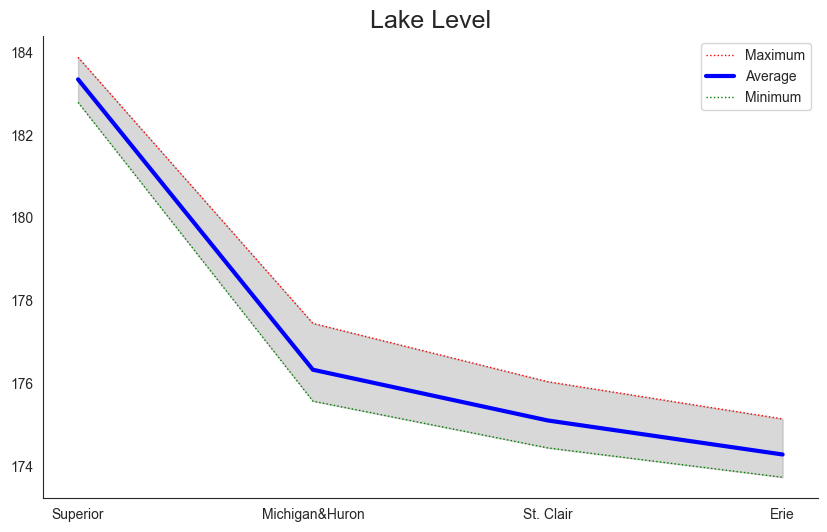

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the seaborn style to match the color scheme of scientific papers
sns.set_style("white")

# Plot the maximum, average, and minimum values with different line styles and colors
plt.plot(["Superior", "Michigan&Huron", "St. Clair", "Erie"], Max_level[:-1], label='Maximum', linestyle=':', color='red', linewidth=1)
plt.plot(["Superior", "Michigan&Huron", "St. Clair", "Erie"], Average_Level[:-1], label='Average', linestyle='-', color='blue', linewidth=3)
plt.plot(["Superior", "Michigan&Huron", "St. Clair", "Erie"], Min_level[:-1], label='Minimum', linestyle=':', color='green', linewidth=1)

# Fill the area between the maximum and minimum values with a shaded region
plt.fill_between(range(len(Max_level[:-1])), Min_level[:-1], Max_level[:-1], alpha=0.3, color='gray')

# Add labels and title
plt.title('Lake Level', fontsize=18)
# plt.xticks(rotation=90)

# Add legend with a smaller font size
plt.legend(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(os.path.join("plots", "Lake_Level.png"))
# Show the plot
plt.show()


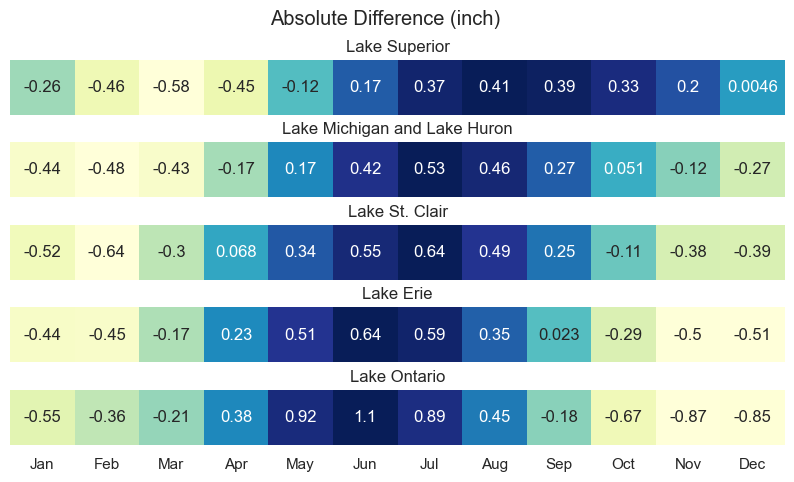

In [103]:
def plot_heatmap_percentage_difference_multiple(lake_names):
    
    # Create a figure and a grid of subplots
    fig, ax = plt.subplots(len(lake_names), 1,  figsize=(10, 5))
    # Set the seaborn style
    sns.set(style="white")
    plt.subplots_adjust(wspace =0, hspace=0.5)#调整子图间距

    # Iterate over each lake data
    for i, lake_name in enumerate(lake_names):
        # Plot the heatmap
        month_data = get_Lake(lake_name).mean()
        best_data = get_Lake(lake_name).mean().mean()
        percentage_difference = month_data - best_data
        inch_difference = percentage_difference / 0.3048
        sns.heatmap(inch_difference.to_frame().T, annot=True, cmap="YlGnBu", cbar=False, ax=ax[i])

        # Set the title
        ax[i].set_title(lake_name)
        if i != len(lake_names) - 1:
            ax[i].set_xticks([])

        # Remove the y-axis ticks and labels
        ax[i].set_yticks([])

    # Set the title
    plt.suptitle("Absolute Difference (inch)")
    plt.savefig(os.path.join("plots", "Lake_Level_Difference_inch.png"))
    # Show the plot
    plt.show()

plot_heatmap_percentage_difference_multiple(Lake_name)

#### 寻找安大略湖最佳水位

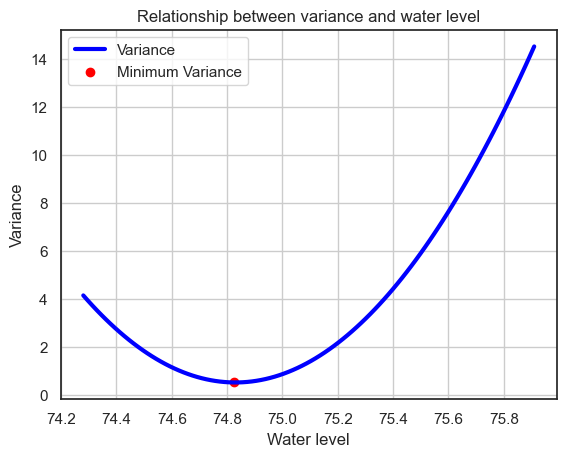

In [139]:
vars = []
for current_x in x:
    var = calculate_variance(get_Lake("Lake Ontario").mean().values, current_x)
    vars.append(var)

# Plot the line graph with labels and title
plt.plot(x, vars, label='Variance', linestyle='-', color='blue', linewidth=3)
plt.xlabel('Water level')
plt.ylabel('Variance')
plt.title('Relationship between variance and water level')

# Find the index of the minimum value of var
min_var_index = np.argmin(vars)

# Get the corresponding x and var values
min_x = x[min_var_index]
min_var = vars[min_var_index]

# Plot the minimum variance point
plt.scatter(min_x, min_var, color='red', label='Minimum Variance')

# Add legend and gridlines
plt.legend()
plt.grid(True)
plt.savefig(os.path.join("plots", "Variance_Water_Level.png"), dpi=400)
plt.show()


#### 得到最好的水位

In [158]:
best_level = Average_Level.tolist()[:-1]
best_level.append(min_x)
best_level

[183.34641304347826,
 176.32891304347825,
 175.1030434782609,
 174.28076086956523,
 74.82333333333334]

/var/folders/_9/8r8psst91fb_xph76cw2pl540000gn/T/ipykernel_43593/1852584845.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Superior", "Michigan&Huron", "St. Clair", "Erie", "Ontario"])


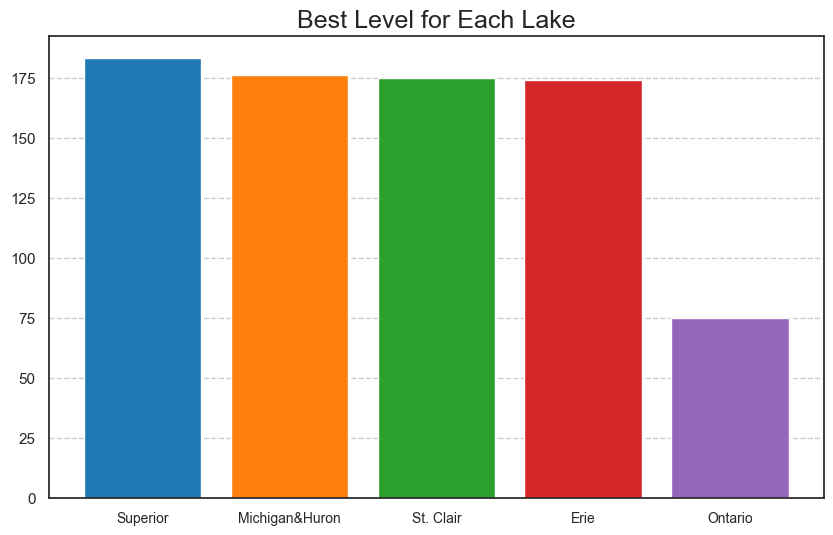

In [169]:
import matplotlib.pyplot as plt

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart with custom colors
ax.bar(["Superior", "Michigan&Huron", "St. Clair", "Erie", "Ontario"], best_level, color=colors)

# Set the y-axis label and title
ax.set_title('Best Level for Each Lake', fontsize=18)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(["Superior", "Michigan&Huron", "St. Clair", "Erie", "Ontario"])

# Add gridlines
ax.grid(axis='y', linestyle='--')

# Adjust the font size of the x-axis labels
plt.xticks(fontsize=10)
plt.savefig(os.path.join("plots", "Best_Level.png"))
# Show the plot
plt.show()
